In [10]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input

from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
df = pd.read_csv('./dataset/cleaned.csv')

In [3]:
df_dummies = df.filter(['event_type', 'flight_condition','flight_operation', 'sightseeing', 'second_pilot'], axis=1)

In [4]:
# One-hot encode 'city', 'state', 'event_type', 'flight_condition','flight_operation', 'sightseeing', 'second_pilot'

df_dummies = pd.get_dummies(df_dummies, columns=['event_type', 'flight_condition', 'flight_operation', 'sightseeing',  'second_pilot'], drop_first=True)

In [5]:
df_dummies.head(1)

,event_type_INC,flight_condition_Unknown,flight_condition_VMC,flight_operation_ADRP,flight_operation_AOBV,flight_operation_ASHO,flight_operation_BANT,flight_operation_BUS,flight_operation_EXEC,flight_operation_EXLD,...,flight_operation_PERS,flight_operation_POSI,flight_operation_PUBF,flight_operation_PUBL,flight_operation_PUBS,flight_operation_PUBU,flight_operation_SKYD,flight_operation_UNK,sightseeing_True,second_pilot_True
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
# making death and injuries as either 1 or 0

for i in range(len(df['deaths_and_injuries'])):
    if df['deaths_and_injuries'][i] > 0:
        df['deaths_and_injuries'][i] = 1

<ipython-input-6-4febe336a289>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['deaths_and_injuries'][i] = 1


In [7]:
df['deaths_and_injuries']

0        0.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
14317    0.0
14318    1.0
14319    1.0
14320    0.0
14321    1.0
Name: deaths_and_injuries, Length: 14322, dtype: float64

In [8]:
X = df_dummies.values
y = df['deaths_and_injuries'].astype(int).values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
X_train[0].shape

(26,)

### Basic Model

In [13]:
# model
model = Sequential()

# h1
model.add(Dense(32, activation='relu', input_shape=(26,)))

# h2
model.add(Dense(16, activation='relu'))

# h3
model.add(Dense(8, activation='relu'))

# # h4
model.add(Dense(4, activation='relu'))

# # h5
model.add(Dense(2, activation='relu'))

# # output
model.add(Dense(1, activation='sigmoid'))

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=16,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose=1) # <- printing

Epoch 1/20
672/672 [==============================] - 7s 7ms/step - loss: 0.6906 - val_loss: 0.6880
Epoch 2/20
672/672 [==============================] - 5s 7ms/step - loss: 0.6804 - val_loss: 0.6737
Epoch 3/20
672/672 [==============================] - 5s 7ms/step - loss: 0.6749 - val_loss: 0.6728
Epoch 4/20
672/672 [==============================] - 4s 7ms/step - loss: 0.6738 - val_loss: 0.6731
Epoch 5/20
672/672 [==============================] - 5s 7ms/step - loss: 0.6734 - val_loss: 0.6733
Epoch 6/20
672/672 [==============================] - 5s 7ms/step - loss: 0.6736 - val_loss: 0.6730
Epoch 7/20
672/672 [==============================] - 4s 7ms/step - loss: 0.6731 - val_loss: 0.6742
Epoch 8/20
672/672 [==============================] - 5s 7ms/step - loss: 0.6731 - val_loss: 0.6730
Epoch 9/20
672/672 [==============================] - 5s 7ms/step - loss: 0.6727 - val_loss: 0.6732
Epoch 10/20
672/672 [==============================] - 4s 6ms/step - loss: 0.6707 - val_loss: 0.6709

In [14]:
preds_loss = model.predict(X_test)

In [15]:
# Visualize the loss
train_loss = results.history['loss']
test_loss = results.history['val_loss']

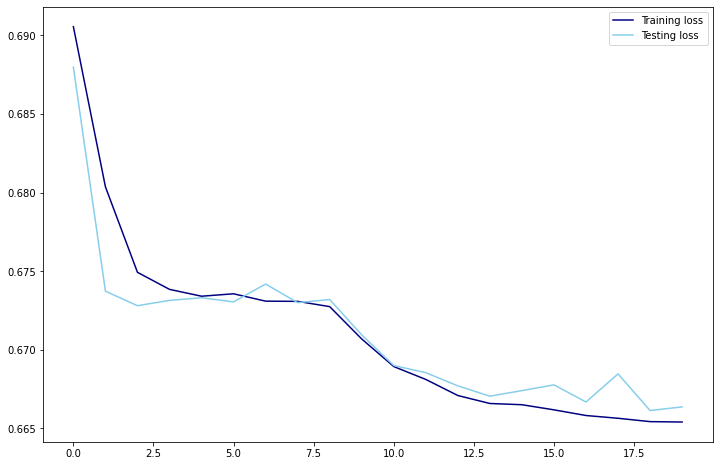

In [16]:
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

plt.savefig('../images/small_nn.png', bbox_inches='tight')

===

### Model with L2 Regularizer

In [17]:
# model
model = Sequential()

# h1
model.add(Dense(32, activation='relu', input_shape=(26,), kernel_regularizer=l2(.001)))

# h2
model.add(Dense(16, activation='relu', kernel_regularizer=l2(.001)))

# h3
model.add(Dense(8, activation='relu', kernel_regularizer=l2(.001)))

# # h4
model.add(Dense(4, activation='relu', kernel_regularizer=l2(.001)))

# # h5
model.add(Dense(2, activation='relu', kernel_regularizer=l2(.001)))

# # output
model.add(Dense(1, activation='sigmoid'))

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=16,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose=1) # <- printing

Epoch 1/20
672/672 [==============================] - 7s 6ms/step - loss: 0.7036 - val_loss: 0.6858
Epoch 2/20
672/672 [==============================] - 4s 6ms/step - loss: 0.6853 - val_loss: 0.6832
Epoch 3/20
672/672 [==============================] - 4s 6ms/step - loss: 0.6821 - val_loss: 0.6795
Epoch 4/20
672/672 [==============================] - 4s 6ms/step - loss: 0.6808 - val_loss: 0.6787
Epoch 5/20
672/672 [==============================] - 4s 6ms/step - loss: 0.6793 - val_loss: 0.6796
Epoch 6/20
672/672 [==============================] - 4s 6ms/step - loss: 0.6787 - val_loss: 0.6775
Epoch 7/20
672/672 [==============================] - 4s 6ms/step - loss: 0.6778 - val_loss: 0.6764
Epoch 8/20
672/672 [==============================] - 4s 6ms/step - loss: 0.6772 - val_loss: 0.6768
Epoch 9/20
672/672 [==============================] - 4s 6ms/step - loss: 0.6766 - val_loss: 0.6751
Epoch 10/20
672/672 [==============================] - 4s 6ms/step - loss: 0.6760 - val_loss: 0.6771

In [18]:
preds_l2 = model.predict(X_test)

In [19]:
# Visualize loss
train_l2 = results.history['loss']
test_l2 = results.history['val_loss']

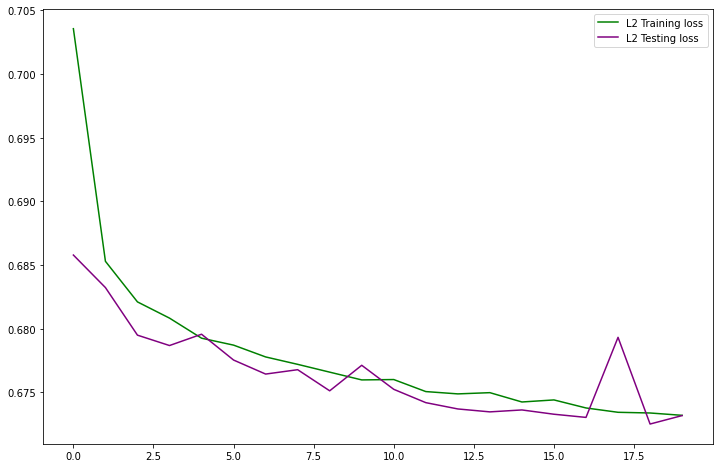

In [20]:
plt.figure(figsize=(12, 8))

plt.plot(train_l2, label='L2 Training loss', color='green')
plt.plot(test_l2, label='L2 Testing loss', color='purple')

plt.legend();

plt.savefig('../images/small_nn_rl2.png', bbox_inches='tight')

===

### Model with Dropout

In [21]:
# model
model = Sequential()

# h1
model.add(Dense(32, activation='relu', input_shape=(26,)))
model.add(Dropout(.8))

# h2
model.add(Dense(16, activation='relu'))
model.add(Dropout(.8))

# h3
model.add(Dense(8, activation='relu'))
model.add(Dropout(.8))

# h4
model.add(Dense(4, activation='relu'))
model.add(Dropout(.8))

# h5
model.add(Dense(2, activation='relu'))
model.add(Dropout(.8))

# output
model.add(Dense(1, activation='sigmoid'))

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=16,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose=1) # <- printing

Epoch 1/20
672/672 [==============================] - 6s 6ms/step - loss: 0.7412 - val_loss: 0.6879
Epoch 2/20
672/672 [==============================] - 3s 5ms/step - loss: 0.6996 - val_loss: 0.6871
Epoch 3/20
672/672 [==============================] - 4s 5ms/step - loss: 0.6932 - val_loss: 0.6871
Epoch 4/20
672/672 [==============================] - 3s 5ms/step - loss: 0.6888 - val_loss: 0.6871
Epoch 5/20
672/672 [==============================] - 4s 5ms/step - loss: 0.6920 - val_loss: 0.6871
Epoch 6/20
672/672 [==============================] - 3s 5ms/step - loss: 0.6891 - val_loss: 0.6871
Epoch 7/20
672/672 [==============================] - 4s 5ms/step - loss: 0.6893 - val_loss: 0.6871
Epoch 8/20
672/672 [==============================] - 3s 5ms/step - loss: 0.6886 - val_loss: 0.6872
Epoch 9/20
672/672 [==============================] - 3s 5ms/step - loss: 0.6890 - val_loss: 0.6871
Epoch 10/20
672/672 [==============================] - 3s 5ms/step - loss: 0.6886 - val_loss: 0.6870

In [22]:
preds_dropout = model.predict(X_test)

In [23]:
train_dropout = results.history['loss']
test_dropout = results.history['val_loss']

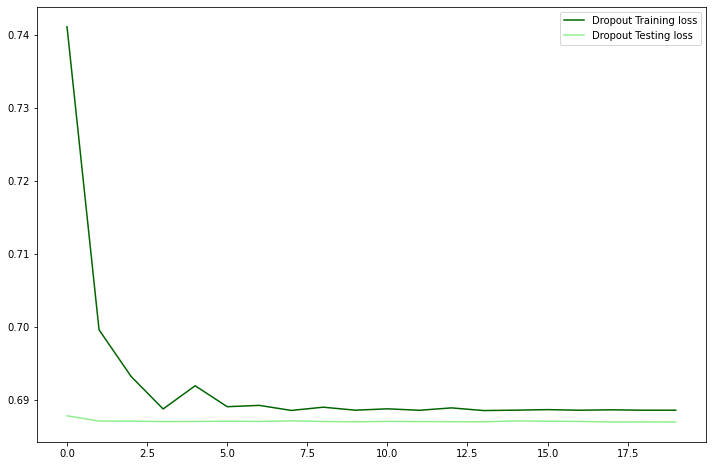

In [24]:
plt.figure(figsize=(12, 8))

plt.plot(train_dropout, label='Dropout Training loss', color='darkgreen')
plt.plot(test_dropout, label='Dropout Testing loss', color='lightgreen')

plt.legend();

plt.savefig('../images/small_nn_drop.png', bbox_inches='tight')

===

### Add early stops

In [25]:
# model
model = Sequential()

# h1
model.add(Dense(32, activation='relu', input_shape=(26,)))
model.add(Dropout(.8))

# h2
model.add(Dense(16, activation='relu'))
model.add(Dropout(.8))

# h3
model.add(Dense(8, activation='relu'))
model.add(Dropout(.8))

# h4
model.add(Dense(4, activation='relu'))
model.add(Dropout(.8))

# h5
model.add(Dense(2, activation='relu'))
model.add(Dropout(.8))

# output
model.add(Dense(1, activation='sigmoid'))
early_stop = EarlyStopping(patience=5)

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=16,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop],
                    verbose=1) # <- printing

Epoch 1/20
672/672 [==============================] - 7s 6ms/step - loss: 0.8429 - val_loss: 0.6877
Epoch 2/20
672/672 [==============================] - 4s 5ms/step - loss: 0.7160 - val_loss: 0.6871
Epoch 3/20
672/672 [==============================] - 4s 6ms/step - loss: 0.6995 - val_loss: 0.6871
Epoch 4/20
672/672 [==============================] - 3s 5ms/step - loss: 0.6938 - val_loss: 0.6871
Epoch 5/20
672/672 [==============================] - 4s 6ms/step - loss: 0.6929 - val_loss: 0.6871
Epoch 6/20
672/672 [==============================] - 4s 6ms/step - loss: 0.6891 - val_loss: 0.6870
Epoch 7/20
672/672 [==============================] - 4s 5ms/step - loss: 0.6891 - val_loss: 0.6871
Epoch 8/20
672/672 [==============================] - 4s 6ms/step - loss: 0.6895 - val_loss: 0.6871
Epoch 9/20
672/672 [==============================] - 4s 6ms/step - loss: 0.6909 - val_loss: 0.6870
Epoch 10/20
672/672 [==============================] - 3s 5ms/step - loss: 0.6890 - val_loss: 0.6870

In [26]:
preds_es = model.predict(X_test)

In [27]:
# Visualize loss
train_es = results.history['loss']
test_es = results.history['val_loss']

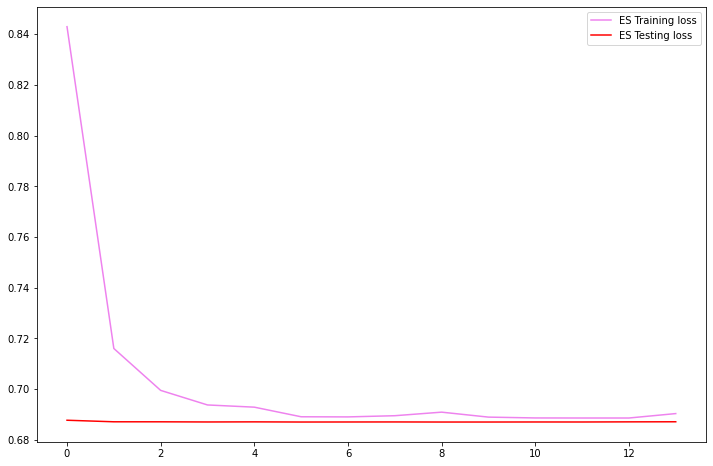

In [28]:
plt.figure(figsize=(12, 8))

plt.plot(train_es, label='ES Training loss', color='violet')
plt.plot(test_es, label='ES Testing loss', color='red')

plt.legend();

plt.savefig('../images/small_nn_es.png', bbox_inches='tight')

### Add early stops, drop and regularizer

In [29]:
# model
model = Sequential()

# h1
model.add(Dense(32, activation='relu', input_shape=(26,), kernel_regularizer=l2(.001)))
model.add(Dropout(.8))

# h2
model.add(Dense(16, activation='relu', kernel_regularizer=l2(.001)))
model.add(Dropout(.8))

# h3
model.add(Dense(8, activation='relu', kernel_regularizer=l2(.001)))
model.add(Dropout(.8))

# h4
model.add(Dense(4, activation='relu', kernel_regularizer=l2(.001)))
model.add(Dropout(.8))

# h5
model.add(Dense(2, activation='relu', kernel_regularizer=l2(.001)))
model.add(Dropout(.8))

# output
model.add(Dense(1, activation='sigmoid'))
early_stop = EarlyStopping(patience=5)

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=16,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop],
                    verbose=1) # <- printing

Epoch 1/20
672/672 [==============================] - 7s 7ms/step - loss: 0.7191 - val_loss: 0.6986
Epoch 2/20
672/672 [==============================] - 4s 5ms/step - loss: 0.6975 - val_loss: 0.6946
Epoch 3/20
672/672 [==============================] - 4s 5ms/step - loss: 0.6950 - val_loss: 0.6920
Epoch 4/20
672/672 [==============================] - 4s 6ms/step - loss: 0.6927 - val_loss: 0.6905
Epoch 5/20
672/672 [==============================] - 3s 5ms/step - loss: 0.6914 - val_loss: 0.6893
Epoch 6/20
672/672 [==============================] - 3s 5ms/step - loss: 0.6905 - val_loss: 0.6885
Epoch 7/20
672/672 [==============================] - 4s 5ms/step - loss: 0.6898 - val_loss: 0.6880
Epoch 8/20
672/672 [==============================] - 3s 5ms/step - loss: 0.6893 - val_loss: 0.6876
Epoch 9/20
672/672 [==============================] - 4s 6ms/step - loss: 0.6890 - val_loss: 0.6873
Epoch 10/20
672/672 [==============================] - 3s 5ms/step - loss: 0.6888 - val_loss: 0.6871

In [30]:
preds_es_rg = model.predict(X_test)

In [31]:
# Visualize loss
train_es_rg = results.history['loss']
test_es_rg = results.history['val_loss']

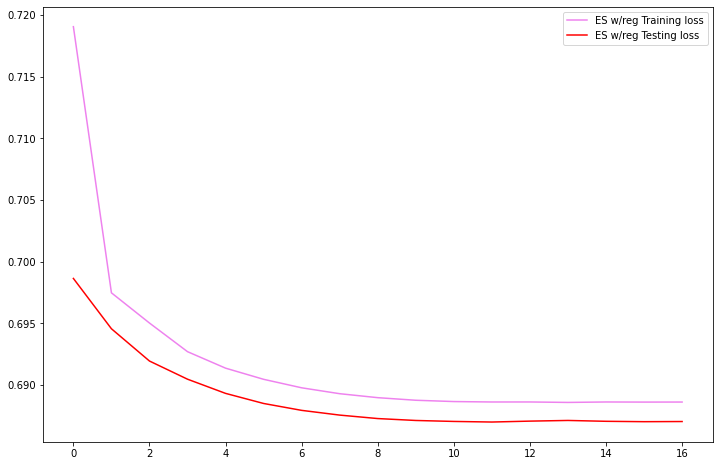

In [32]:
plt.figure(figsize=(12, 8))

plt.plot(train_es_rg, label='ES w/reg Training loss', color='violet')
plt.plot(test_es_rg, label='ES w/reg Testing loss', color='red')

plt.legend();

plt.savefig('../images/ssmall_nn_es_rg.png', bbox_inches='tight')